In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df1 = data.drop(["ID#"], axis=1)

In [6]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
data1 = pd.DataFrame(normalize(df1), columns=df1.columns)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [8]:
stscaler = StandardScaler().fit_transform(df1)
mmscaler = MinMaxScaler().fit_transform(df1)
#X1 = stscaler.transform(array)

# Hierarchical

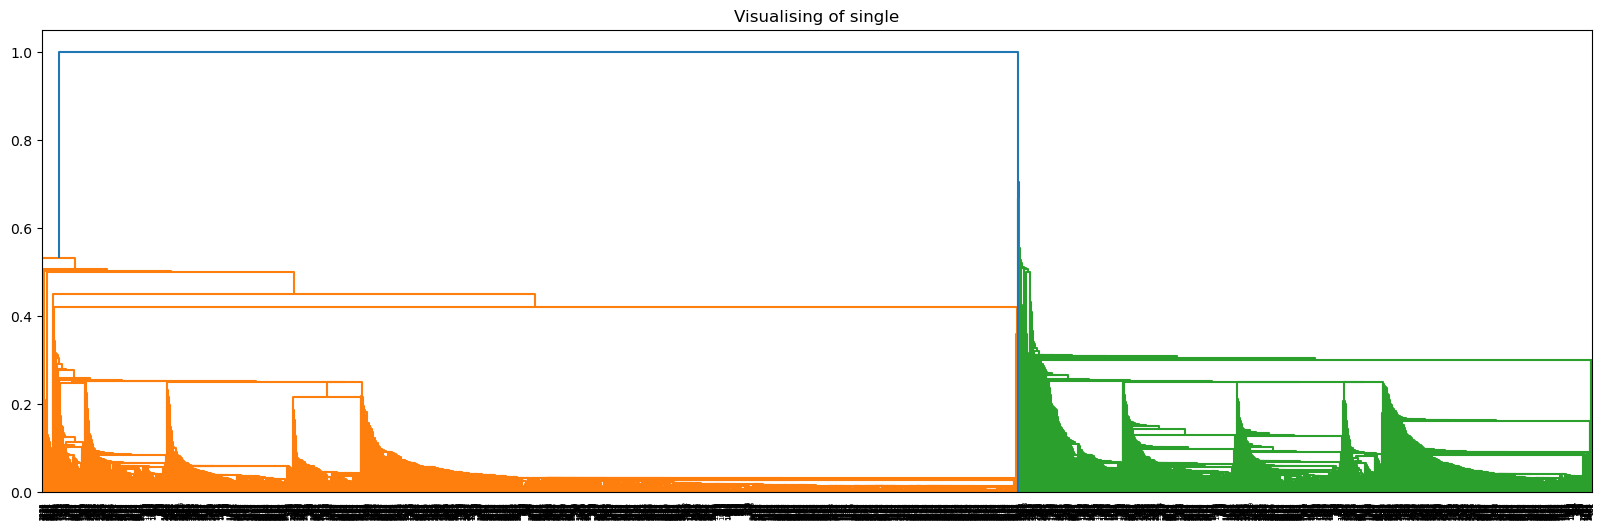

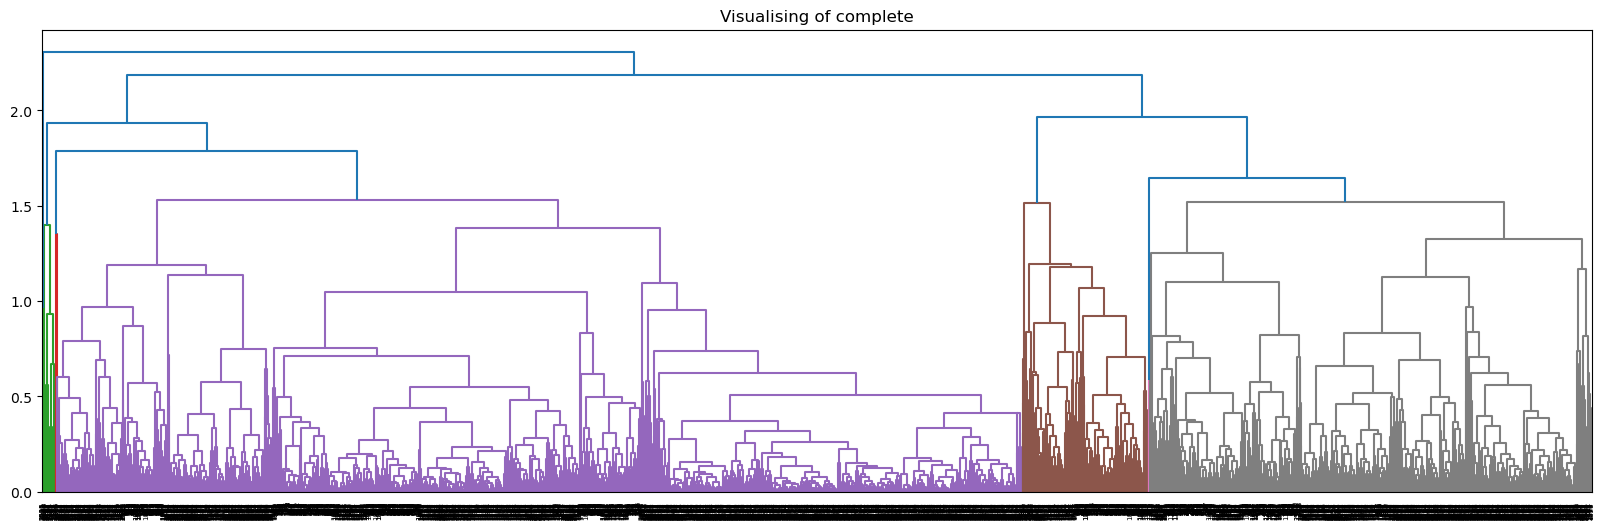

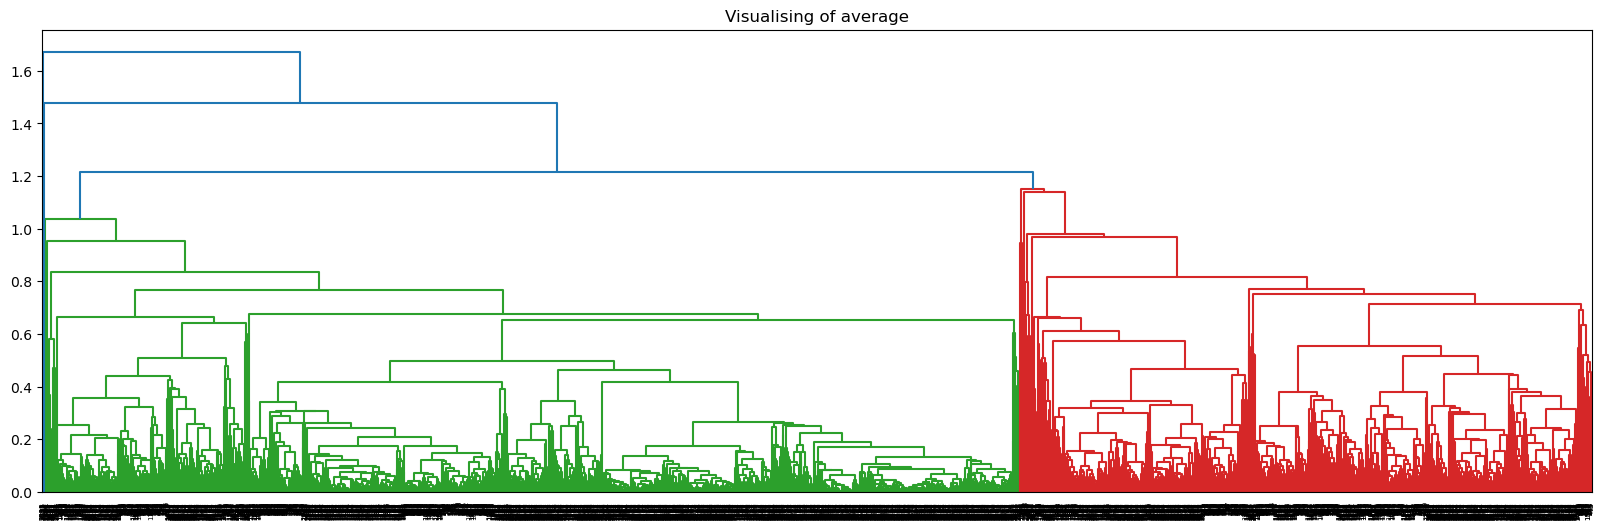

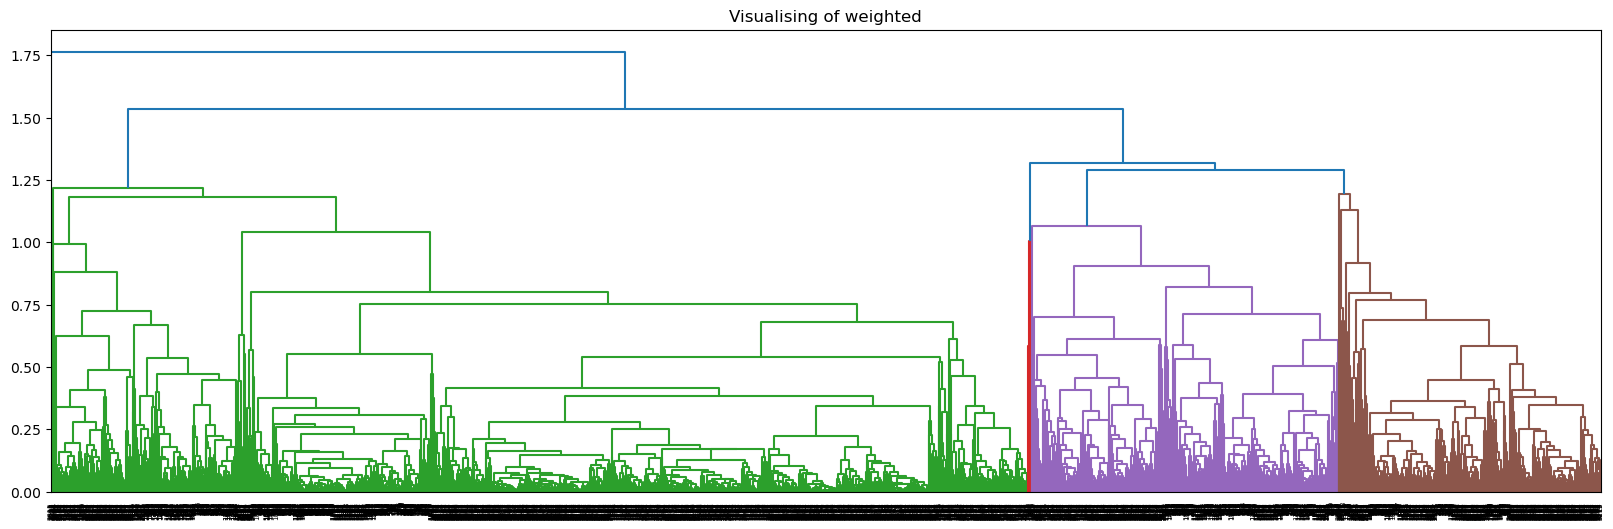

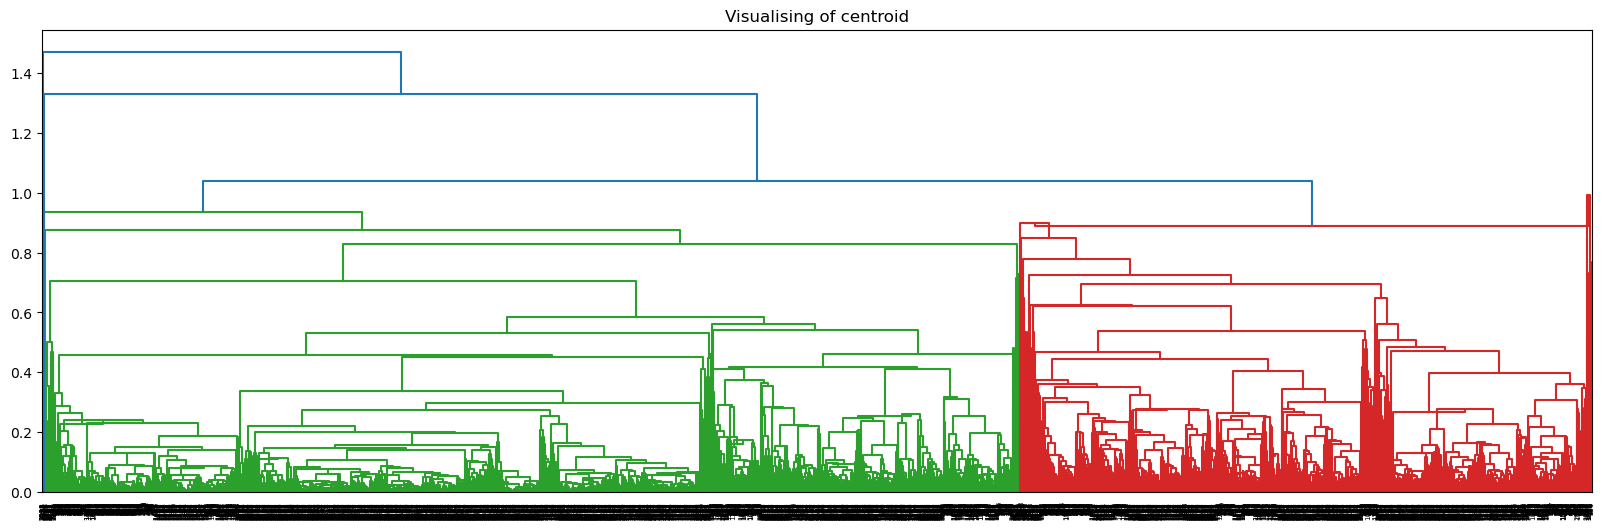

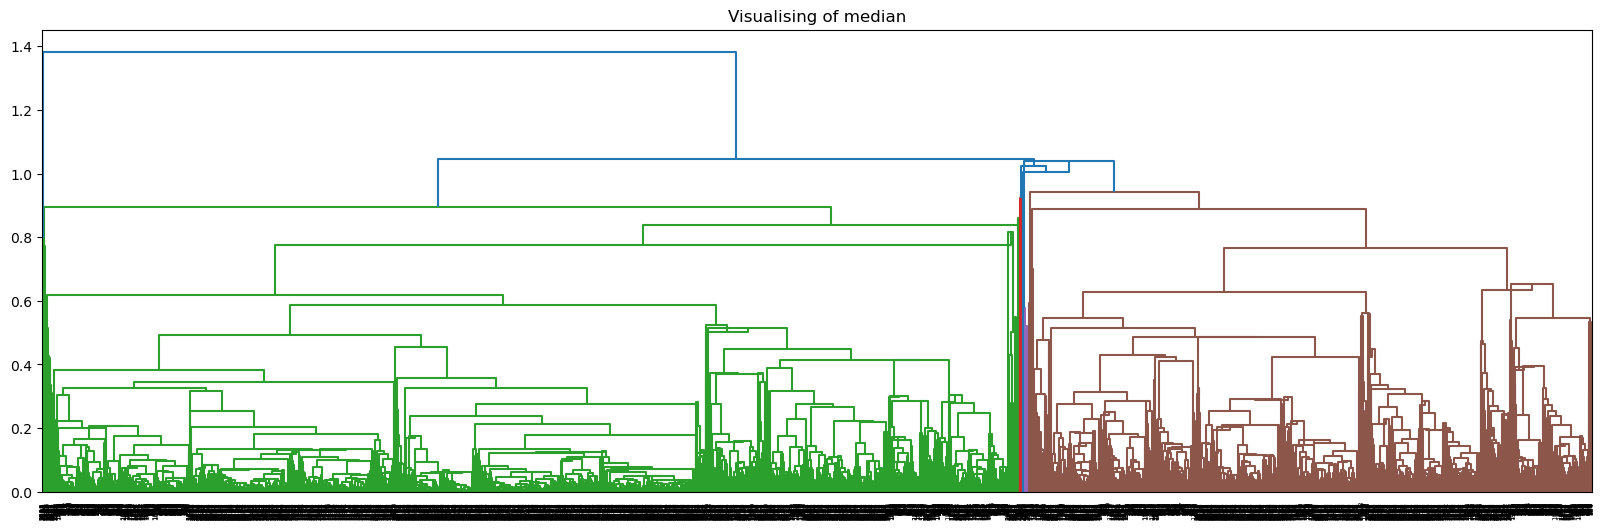

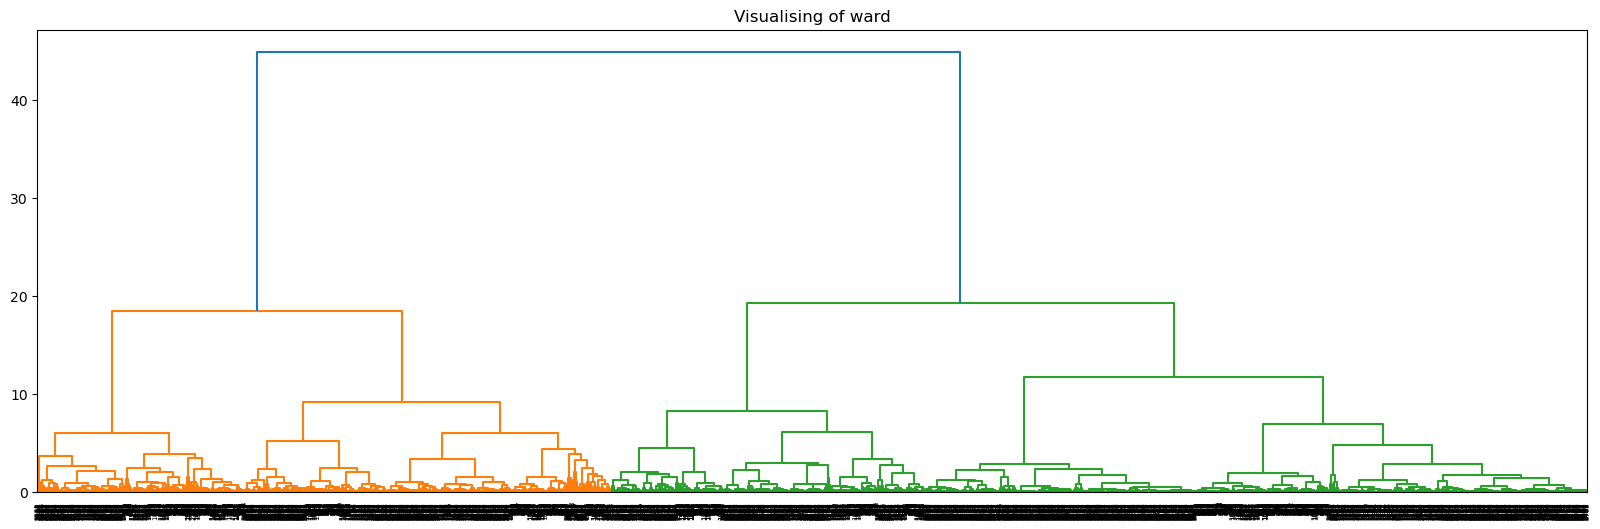

In [9]:
for m in ["single", "complete", "average", "weighted", "centroid", "median", "ward"]:
    plt.figure(figsize=(20, 6))
    plt.title("Visualising of {}".format(m))
    dendogram1 = sch.dendrogram(sch.linkage(mmscaler, method=m, optimal_ordering=False))

In [10]:
#using minmaxscaler
for n in range(2,11):
    for link in ["ward", "complete", "average", "single"]:
        hc = AgglomerativeClustering(n_clusters=n, linkage=link)
        hlabel = hc.fit_predict(mmscaler)
        sill = sil(mmscaler, hlabel)
        print("For clusters =", n, "The average silhouette score with linkage ", link, ": ", sill)
    print(" ")

For clusters = 2 The average silhouette score with linkage  ward :  0.535930510919477
For clusters = 2 The average silhouette score with linkage  complete :  0.47040913679492186
For clusters = 2 The average silhouette score with linkage  average :  0.47040913679492186
For clusters = 2 The average silhouette score with linkage  single :  0.535930510919477
 
For clusters = 3 The average silhouette score with linkage  ward :  0.43550164891825044
For clusters = 3 The average silhouette score with linkage  complete :  0.5318787367232326
For clusters = 3 The average silhouette score with linkage  average :  0.39619766243707655
For clusters = 3 The average silhouette score with linkage  single :  0.5351606918177734
 
For clusters = 4 The average silhouette score with linkage  ward :  0.42494300944261365
For clusters = 4 The average silhouette score with linkage  complete :  0.46459708515197673
For clusters = 4 The average silhouette score with linkage  average :  0.5286018409871408
For cluste

In [11]:
#using standard scaler

for n in range(2, 11):
    for link in ["ward", "complete", "average", "single"]:
        hc = AgglomerativeClustering(n_clusters=n, linkage=link)
        hl = hc.fit_predict(stscaler)
        sill = sil(stscaler, hl)
        print("For clusters = ", n, ", the average silhoutte score with linkage ", link, ": ", sill)
    print(" ")

For clusters =  2 , the average silhoutte score with linkage  ward :  0.28926595242577247
For clusters =  2 , the average silhoutte score with linkage  complete :  0.8111134025692677
For clusters =  2 , the average silhoutte score with linkage  average :  0.8111134025692677
For clusters =  2 , the average silhoutte score with linkage  single :  0.8562820070415407
 
For clusters =  3 , the average silhoutte score with linkage  ward :  0.2940432062008608
For clusters =  3 , the average silhoutte score with linkage  complete :  0.7760836053602842
For clusters =  3 , the average silhoutte score with linkage  average :  0.7838667595062349
For clusters =  3 , the average silhoutte score with linkage  single :  0.7350532148998382
 
For clusters =  4 , the average silhoutte score with linkage  ward :  0.30814152852022786
For clusters =  4 , the average silhoutte score with linkage  complete :  0.5985727763092806
For clusters =  4 , the average silhoutte score with linkage  average :  0.7731120

In [12]:
hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

In [13]:
a =pd.DataFrame(hc.fit_predict(df1),columns=["Cluster_ID"])
a["Cluster_ID"].value_counts()

1    3215
0     784
Name: Cluster_ID, dtype: int64

In [14]:
data1["Clust_ID"] = hc.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust_ID
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,1
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,1
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,1
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,1
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,1
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,1
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,1
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,1


# KMeans

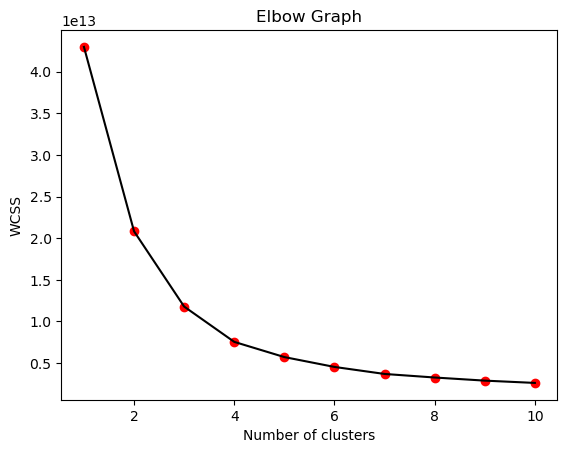

In [15]:
# Elbow graph

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df1)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, color="black")
plt.scatter(range(1,11), wcss, color="red")
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
for n in range(2, 11):
    clust1 = KMeans(n_clusters=n)
    c_label = clust1.fit_predict(stscaler)
    sill = sil(stscaler, c_label)
    print("For ", n, " clusters, the average silhoutte score is : ", sill)

For  2  clusters, the average silhoutte score is :  0.32542136327826215
For  3  clusters, the average silhoutte score is :  0.31120487849128786
For  4  clusters, the average silhoutte score is :  0.31081753771404597
For  5  clusters, the average silhoutte score is :  0.2685025900553163
For  6  clusters, the average silhoutte score is :  0.33416155020238786
For  7  clusters, the average silhoutte score is :  0.2211341657539037
For  8  clusters, the average silhoutte score is :  0.23672499694488633
For  9  clusters, the average silhoutte score is :  0.245863692710433
For  10  clusters, the average silhoutte score is :  0.2606178050186951


In [17]:
for n in range(2, 11):
    clust1 = KMeans(n_clusters=n)
    c_label = clust1.fit_predict(mmscaler)
    sill = sil(mmscaler, c_label)
    print("For ", n, " clusters, the average silhoutte score is : ", sill)

For  2  clusters, the average silhoutte score is :  0.535930510919477
For  3  clusters, the average silhoutte score is :  0.46484529388583046
For  4  clusters, the average silhoutte score is :  0.4744941579482721
For  5  clusters, the average silhoutte score is :  0.4430672072796034
For  6  clusters, the average silhoutte score is :  0.4023531337957163
For  7  clusters, the average silhoutte score is :  0.391042679657711
For  8  clusters, the average silhoutte score is :  0.3809372100223161
For  9  clusters, the average silhoutte score is :  0.38450796330031123
For  10  clusters, the average silhoutte score is :  0.34547608243865324


In [18]:
# building model with k = 2 and Min Max Scaler
model1 = KMeans(n_clusters=2)
y_pred = model1.fit_predict(mmscaler)
y_pred


array([0, 0, 0, ..., 1, 0, 0])

In [19]:
model1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
df2 = data.drop(["ID#"], axis=1)
df2["Label"] = model1.labels_
df2["Label"].value_counts()

0    2518
1    1481
Name: Label, dtype: int64

# DBSCAN

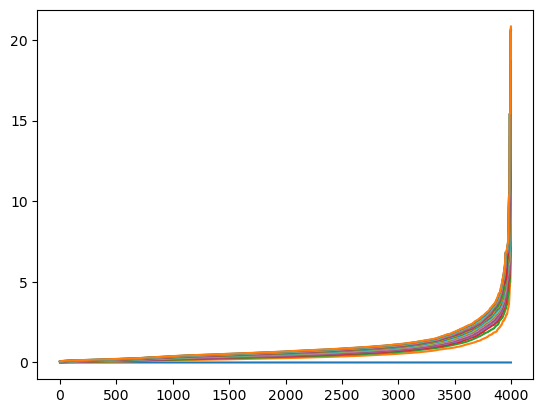

In [36]:
#to find eps
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=22)
nbrs =  neigh.fit(stscaler)
distances, indices = nbrs.kneighbors(stscaler)
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [22]:

for i in np.arange(2,5, 0.25):
    for j in np.arange(2, 25):
        db = DBSCAN(min_samples=j, eps=i).fit(stscaler)
        labels = db.labels_
        sill = sil(stscaler, labels)
        print(f"For {i} eps with {j} samples silhoutte score is ", sill)
    print("")

For 2.0 eps with 2 samples silhoutte score is  0.23652903033536252
For 2.0 eps with 3 samples silhoutte score is  0.2457363433586349
For 2.0 eps with 4 samples silhoutte score is  0.25245994783602205
For 2.0 eps with 5 samples silhoutte score is  0.25376617762145437
For 2.0 eps with 6 samples silhoutte score is  0.258497793273823
For 2.0 eps with 7 samples silhoutte score is  0.2610066076670955
For 2.0 eps with 8 samples silhoutte score is  0.2600354605303995
For 2.0 eps with 9 samples silhoutte score is  0.2595541887678371
For 2.0 eps with 10 samples silhoutte score is  0.25546923305422986
For 2.0 eps with 11 samples silhoutte score is  0.2554098234414895
For 2.0 eps with 12 samples silhoutte score is  0.255303940580989
For 2.0 eps with 13 samples silhoutte score is  0.2557193718418299
For 2.0 eps with 14 samples silhoutte score is  0.2551564126067076
For 2.0 eps with 15 samples silhoutte score is  0.2545414533773431
For 2.0 eps with 16 samples silhoutte score is  0.2525764103513754
F

For 3.25 eps with 10 samples silhoutte score is  0.5444624927201707
For 3.25 eps with 11 samples silhoutte score is  0.5444624927201707
For 3.25 eps with 12 samples silhoutte score is  0.5449608764490093
For 3.25 eps with 13 samples silhoutte score is  0.545364631361462
For 3.25 eps with 14 samples silhoutte score is  0.540864313341219
For 3.25 eps with 15 samples silhoutte score is  0.5410285614576027
For 3.25 eps with 16 samples silhoutte score is  0.5410940024827051
For 3.25 eps with 17 samples silhoutte score is  0.5411479661798654
For 3.25 eps with 18 samples silhoutte score is  0.539619652653416
For 3.25 eps with 19 samples silhoutte score is  0.539619652653416
For 3.25 eps with 20 samples silhoutte score is  0.5397500738003308
For 3.25 eps with 21 samples silhoutte score is  0.5400423416683747
For 3.25 eps with 22 samples silhoutte score is  0.5404452067413252
For 3.25 eps with 23 samples silhoutte score is  0.5404452067413252
For 3.25 eps with 24 samples silhoutte score is  0.5

For 4.5 eps with 18 samples silhoutte score is  0.5354046766653112
For 4.5 eps with 19 samples silhoutte score is  0.5354046766653112
For 4.5 eps with 20 samples silhoutte score is  0.5354046766653112
For 4.5 eps with 21 samples silhoutte score is  0.5356392069818413
For 4.5 eps with 22 samples silhoutte score is  0.5356392069818413
For 4.5 eps with 23 samples silhoutte score is  0.5356392069818413
For 4.5 eps with 24 samples silhoutte score is  0.5356416233708451

For 4.75 eps with 2 samples silhoutte score is  0.4534734651483762
For 4.75 eps with 3 samples silhoutte score is  0.45508251733251576
For 4.75 eps with 4 samples silhoutte score is  0.5436184028842667
For 4.75 eps with 5 samples silhoutte score is  0.5422095940779087
For 4.75 eps with 6 samples silhoutte score is  0.5435075511009723
For 4.75 eps with 7 samples silhoutte score is  0.5436619690363853
For 4.75 eps with 8 samples silhoutte score is  0.5436619690363853
For 4.75 eps with 9 samples silhoutte score is  0.5436619690

In [23]:
#the best score is for eps 2.5 wirh sample 21
df3 = data
df3["DB_Labels"] = db.labels_
df3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DB_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


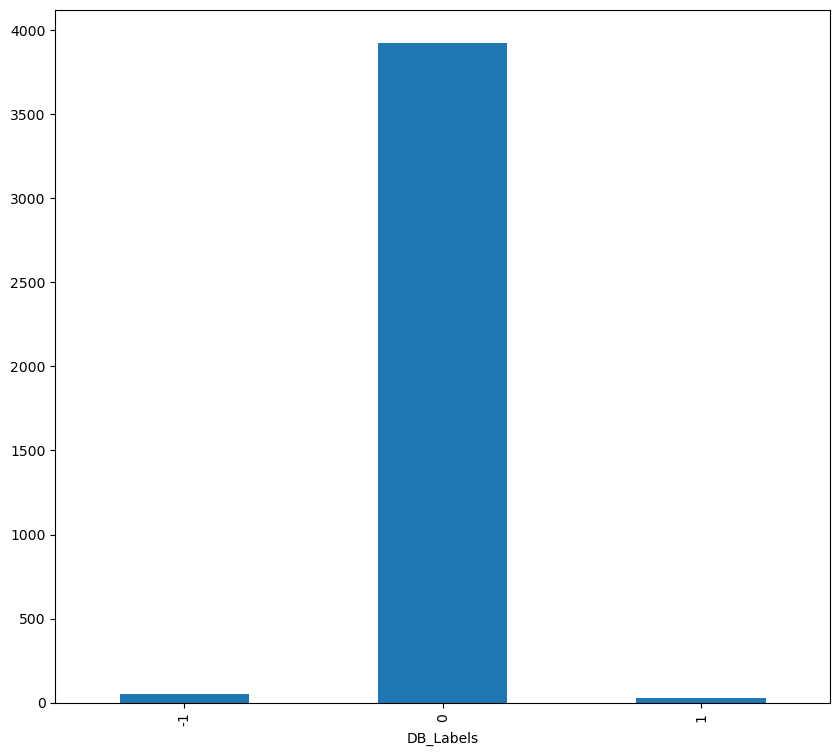

In [24]:
fig, ax = plt.subplots(figsize=(10, 9))
df3.groupby(["DB_Labels"]).count()["ID#"].plot(kind="bar")
plt.show()

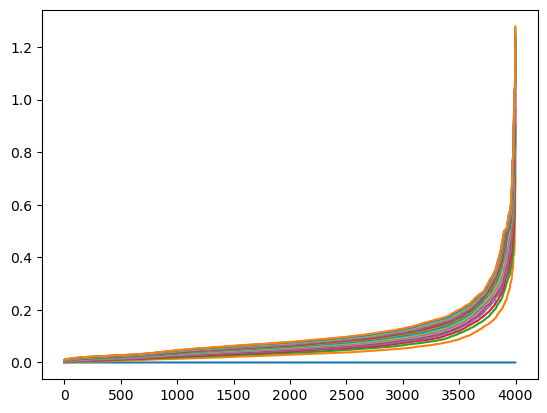

In [25]:
#MinMaxScaler
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=22)
nbrs =  neigh.fit(mmscaler)
distances, indices = nbrs.kneighbors(mmscaler)
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [34]:
for i in np.arange(2,6, 0.25):
    for j in np.arange(2, 25):
        db = DBSCAN(min_samples=j, eps=i).fit(mmscaler)
        labels = db.labels_
        #print(set(labels))
        if len(set(labels)) > 1:
            sill = sil(mmscaler, labels)
            print(f"For {i} eps with {j} samples silhoutte score is ", sill)
    print("")